<b>Importing the required libraries</b> <br><br>
*Pandas is an open source Python package that is most widely used for data science/data analysis and machine learning tasks. It is built on top of another package named Numpy, which provides support for multi-dimensional arrays. <br>
*NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.


In [1]:
import pandas as pd
import numpy as np

#To see the entire dataframe when printing
pd.set_option("display.max_columns", None)

pd.set_option("display.max_rows", 200)

import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv('dataset_1.csv')
df.head()

,Brand,Model,ROM,RAM,OS,Screen size,Dual Sim,Expandable Memory,5G,Fingerprint Sensor,Price
0,Huawei,Y5 Prime,16.0,2.0,Android,5.45,Yes,Yes,No,Yes,5000
1,Huawei,Y5,16.0,2.0,Android,5.71,Yes,Yes,No,Yes,5000
2,Apple,iPhone 4S,16.0,0.5,iOS,3.50,No,No,No,No,5000
3,Huawei,Y5,16.0,2.0,Android,5.71,No,No,No,No,5000
4,Huawei,Y5,16.0,2.0,Android,5.71,Yes,No,No,No,5000


In [3]:
df.describe()

,ROM,RAM,Screen size,Price
count,26198.000000,40023.000000,40023.000000,40023.000000
mean,103.224136,3.398993,5.713437,52520.393774
std,81.007850,1.828223,0.735010,51767.697069
min,0.016000,0.004000,2.200000,5000.000000
25%,64.000000,2.000000,5.000000,22072.500000
50%,64.000000,3.000000,5.850000,35000.000000
75%,128.000000,4.000000,6.400000,59900.000000
max,1024.000000,12.000000,7.600000,475000.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40023 entries, 0 to 40022
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Brand               40023 non-null  object 
 1   Model               40023 non-null  object 
 2   ROM                 26198 non-null  float64
 3   RAM                 40023 non-null  float64
 4   OS                  40023 non-null  object 
 5   Screen size         40023 non-null  float64
 6   Dual Sim            40023 non-null  object 
 7   Expandable Memory   40023 non-null  object 
 8   5G                  40023 non-null  object 
 9   Fingerprint Sensor  40023 non-null  object 
 10  Price               40023 non-null  int64  
dtypes: float64(3), int64(1), object(7)
memory usage: 3.4+ MB


There are 40023 rows of data after initial data cleaning steps. 
Also, there are 11 columns which include 10 features and the price.
We can process the data further to explore the relationships among features and to extract the important information.

<b>Handling the missing data</b> <br><br>
Filling the missing values in the ROM column.
Pandas dataframe.interpolate() function is basically used to fill NA values in the dataframe or series. 
But, this is a very powerful function to fill the missing values. It uses various interpolation technique to fill the missing values rather than hard-coding the value. We have used the nearest method since the rows are sorted in the ascending order. The ROM values can assume to take the value of its nearest member in the forward direction.

In [5]:
df.isnull().sum()

Brand                     0
Model                     0
ROM                   13825
RAM                       0
OS                        0
Screen size               0
Dual Sim                  0
Expandable Memory         0
5G                        0
Fingerprint Sensor        0
Price                     0
dtype: int64

In [6]:
(df.isnull().sum()/df.shape[0]*100)[df.isnull().sum()>0]

ROM    34.542638
dtype: float64

<b>Observation</b> <br><br>
ROM column containes 13896 missing values. So these have to be filled using a suitable method.

In [7]:
df = df.interpolate(method ='nearest', limit_direction ='forward')

Earlier the ROM column contained only 26127 values.
After filling the missing data now it contains values for all the 40023 rows. And all the other columns seems to be fine. And let us see how the non-numeric columns appear in our dataset.

In [8]:
df.head()

,Brand,Model,ROM,RAM,OS,Screen size,Dual Sim,Expandable Memory,5G,Fingerprint Sensor,Price
0,Huawei,Y5 Prime,16.0,2.0,Android,5.45,Yes,Yes,No,Yes,5000
1,Huawei,Y5,16.0,2.0,Android,5.71,Yes,Yes,No,Yes,5000
2,Apple,iPhone 4S,16.0,0.5,iOS,3.50,No,No,No,No,5000
3,Huawei,Y5,16.0,2.0,Android,5.71,No,No,No,No,5000
4,Huawei,Y5,16.0,2.0,Android,5.71,Yes,No,No,No,5000


In [9]:
df.describe()

,ROM,RAM,Screen size,Price
count,40023.000000,40023.000000,40023.000000,40023.000000
mean,99.089356,3.398993,5.713437,52520.393774
std,78.277418,1.828223,0.735010,51767.697069
min,0.016000,0.004000,2.200000,5000.000000
25%,32.000000,2.000000,5.000000,22072.500000
50%,64.000000,3.000000,5.850000,35000.000000
75%,128.000000,4.000000,6.400000,59900.000000
max,1024.000000,12.000000,7.600000,475000.000000


<b>Exploring the dataset</b><br>
Unique values for categorical variables

In [10]:
for column in df.columns:
    if df[column].dtype == "object":
        print(column.upper(), ": ", df[column].nunique())
        print(df[column].value_counts())
        print("\n")
        print("*" * 55)
        print("\n")

BRAND :  17
Apple         18751
Samsung        8716
Huawei         3027
Xiaomi         2941
Sony           2301
Oppo           1264
Vivo            797
Nokia           638
LG              561
OnePlus         342
Realme          315
Google          147
Infinix         114
HTC              61
BlackBerry       17
Asus             17
Greentel         14
Name: Brand, dtype: int64


*******************************************************


MODEL :  600
iPhone 7         3850
iPhone 7 Plus    2883
iPhone 6S        2401
iPhone X         1352
iPhone 8          989
                 ... 
Q70                 1
Redmi Note 4X       1
Galaxy M62          1
Honor 9             1
One E9              1
Name: Model, Length: 600, dtype: int64


*******************************************************


OS :  5
Android          21242
iOS              18751
BlackBerry OS       17
Other               10
Symbian OS           3
Name: OS, dtype: int64


*******************************************************


DU

Information related to the dataframe is taken below. It shows the datatype of each column.<br>
Most of them are object type and others are float and integers.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40023 entries, 0 to 40022
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Brand               40023 non-null  object 
 1   Model               40023 non-null  object 
 2   ROM                 40023 non-null  float64
 3   RAM                 40023 non-null  float64
 4   OS                  40023 non-null  object 
 5   Screen size         40023 non-null  float64
 6   Dual Sim            40023 non-null  object 
 7   Expandable Memory   40023 non-null  object 
 8   5G                  40023 non-null  object 
 9   Fingerprint Sensor  40023 non-null  object 
 10  Price               40023 non-null  int64  
dtypes: float64(3), int64(1), object(7)
memory usage: 3.4+ MB


In [12]:
df.nunique()

Brand                   17
Model                  600
ROM                     12
RAM                     25
OS                       5
Screen size             86
Dual Sim                 2
Expandable Memory        2
5G                       2
Fingerprint Sensor       2
Price                 2049
dtype: int64

<b>Observation</b> <br><br>
1. Apple iPhone 7 has the highest number of occurences in the dataset.<br>
2. Most of the mobile phones doesnt support dual sim.<br>
3. Also in the selected dataset many mobile phones doesn't suport Expandable memory and 5G networks.<br>
4. 4 major operating systems (Android, iOS, Symbian OS, Blackberry OS) are available and 5th category is named as "other", since they are less known operating systems which come for feature phones or the earlier generations of mobile phones.

A summary of the dataset is taken above. As shown there are 17 unique brands of mobile phones and 601 unique models. 
Also, 8 ROM capacities and 17 RAM capacities. We can see that there are 42 screen size variations available. 
Dual Sim, Expandable memory, 5G options and the availability of the Fingerprint sensor are boolean variables. Therefore only two values can be present for them (Yes/No). Finally the Price is given and there are 2051 different price points.

## Data Visualization

Categorical data is present in the Dual Sim, Expandable memory, 5G and Fingerprint Sensor columns. Therefore converting them to numeric values will be favourable for future work. Also the ML libraries will be able to handle only numeric values. <br><br>
"Yes" and "No" values are converted to 1's and 0's respectively. Replace method is used for them which is available in the Pandas library. This can easily replace the data with the given values. And the visualization of the data is carried out after that. 

In [13]:
df["Dual Sim"] = df["Dual Sim"].replace(["Yes","No"],[1,0])
df["Expandable Memory"] = df["Expandable Memory"].replace(["Yes","No"],[1,0])
df["5G"] = df["5G"].replace(["Yes","No"],[1,0])
df["Fingerprint Sensor"] = df["Fingerprint Sensor"].replace(["Yes","No"],[1,0])

In [14]:
df.head()

,Brand,Model,ROM,RAM,OS,Screen size,Dual Sim,Expandable Memory,5G,Fingerprint Sensor,Price
0,Huawei,Y5 Prime,16.0,2.0,Android,5.45,1,1,0,1,5000
1,Huawei,Y5,16.0,2.0,Android,5.71,1,1,0,1,5000
2,Apple,iPhone 4S,16.0,0.5,iOS,3.50,0,0,0,0,5000
3,Huawei,Y5,16.0,2.0,Android,5.71,0,0,0,0,5000
4,Huawei,Y5,16.0,2.0,Android,5.71,1,0,0,0,5000


In [15]:
df.describe(include="object")

,Brand,Model,OS
count,40023,40023,40023
unique,17,600,5
top,Apple,iPhone 7,Android
freq,18751,3850,21242


Generating insights using plots

## Features vs Target Variable

Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Here we have imported the matplotlib library. Pyplot is a Matplotlib module which provides a MATLAB-like interface. Matplotlib is designed to be as usable as MATLAB, with the ability to use Python and the advantage of being free and open-source. Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc. The various plots we can utilize using Pyplot are Line Plot, Histogram, Scatter, 3D Plot, Image, Contour, and Polar.


In [16]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Average Price')

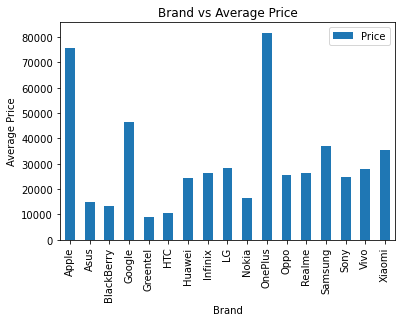

In [17]:
#calculating the mean value of the prices of each brand.
(df.groupby('Brand')['Price'].mean()).plot(kind="bar",legend = True)
plt.title('Brand vs Average Price')
plt.xlabel("Brand")
plt.ylabel("Average Price")

In the above graph we have plotted the mean value of the price for each brand. <br>
As the observations we can see that the average price of a Onepus phone is the highest and next to that Apple phones have the second highest average price. And google mobile phones in the third place. <br>
This information is true compared to real world prices, since we know that Apple and Oneplus mobile phones have high prices in the market.

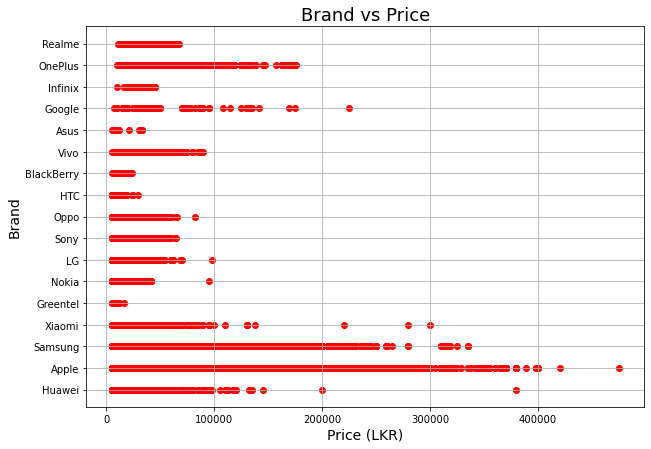

In [18]:

plt.figure(figsize=(10,7))
plt.scatter(df["Price"], df["Brand"], color="red")
plt.title("Brand vs Price", fontsize = 18)
plt.xlabel("Price (LKR)", fontsize = 14)
plt.ylabel("Brand", fontsize = 14)
plt.grid(True)
plt.show()


<b>Observations</b><br><br>
A wide variation of prices exist for the brands such as Samsung, Xiaomi, Apple and Huawei.<br>
The reason for this must be the existence of lot of models at different price points from these manufacturers.
Some outliers exist for Xiaomi, Samsung, Apple and Huawei and these will be handled later before training the prediction models.

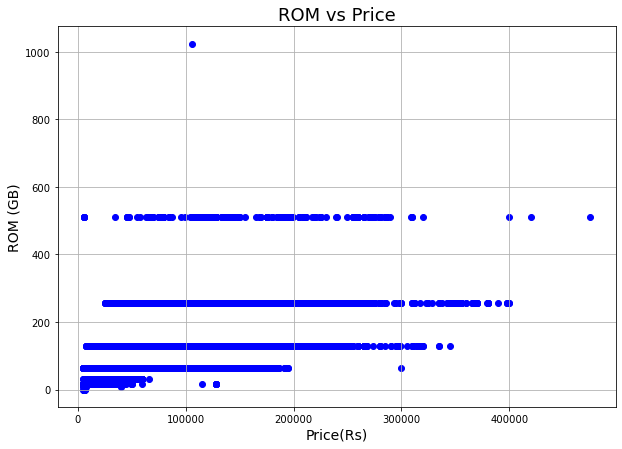

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.scatter(df["Price"], df["ROM"], color="blue")
plt.title("ROM vs Price", fontsize = 18)
plt.xlabel("Price(Rs)", fontsize = 14)
plt.ylabel("ROM (GB)", fontsize = 14)
plt.grid(True)
plt.show()

<b>Observations</b><br><br>
A few variations exist for the ROM capacities. <br>
The feature phones will have less memory space and smartphones will have ROM even upto 1TB.
Therefore according to the dataset There are many phones with ROM in between the range of 0 to 64GB and also with some outliers.

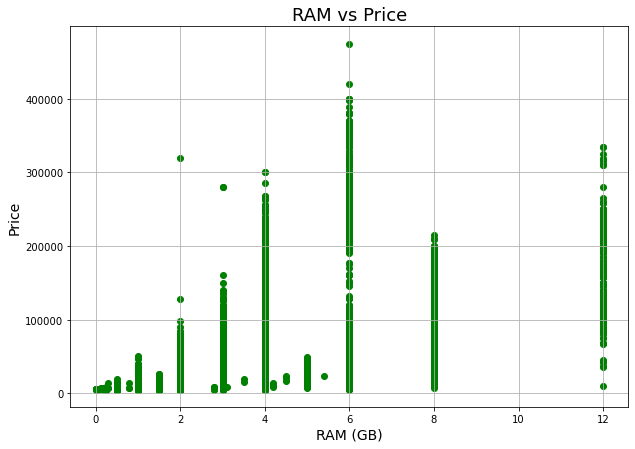

In [20]:
plt.figure(figsize=(10,7))
plt.scatter(df["RAM"], df["Price"], color="green")
plt.title("RAM vs Price", fontsize = 18)
plt.xlabel("RAM (GB)", fontsize = 14)
plt.ylabel("Price", fontsize = 14)
plt.grid(True)
plt.show()

<b>Observations</b><br><br>
A few variations exist for the RAM capacities. <br>
The feature phones will have less RAM (less than 1GB) and smartphones will have RAM even upto 12 GB.
Therefore according to the dataset There are many phones with RAM in the range of 0 to 6GB and also with some outliers.

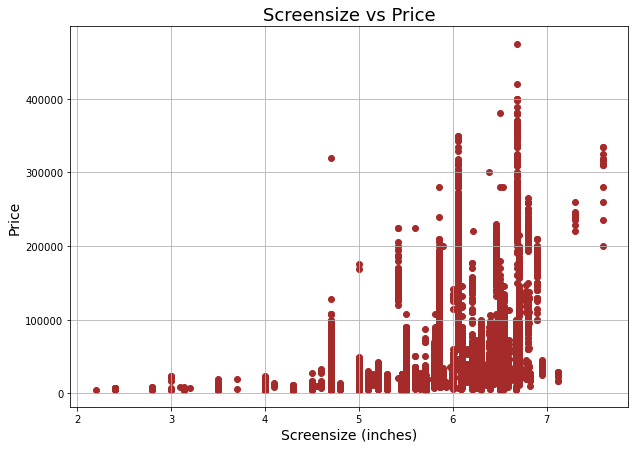

In [21]:
plt.figure(figsize=(10,7))
plt.scatter(df["Screen size"], df["Price"], color="brown")
plt.title("Screensize vs Price", fontsize = 18)
plt.xlabel("Screensize (inches)", fontsize = 14)
plt.ylabel("Price", fontsize = 14)
plt.grid(True)
plt.show()

<b>Observations</b><br><br>
A huge variations exist for the Screen sizes and can be said that it shows a mixed relationship for smartphones. <br>
The feature phones are the ones with smaller screensizes and much new smartphones usually comes with 5 inches or larger screens.
Therefore according to the dataset majority of the mobile phones has a screen size in between 5-7inches.  

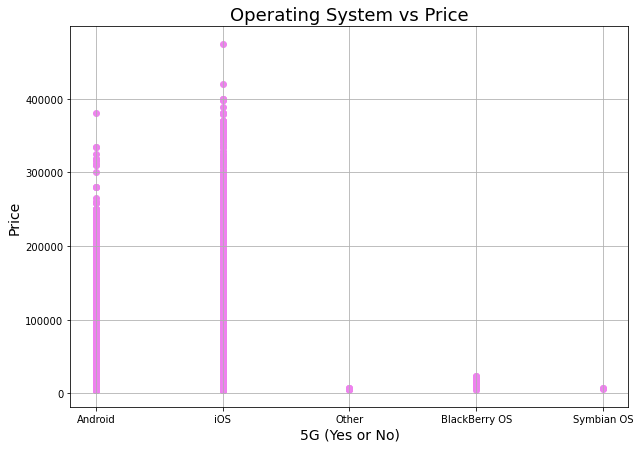

In [22]:
plt.figure(figsize=(10,7))
plt.scatter(df["OS"], df["Price"], color="violet")
plt.title("Operating System vs Price", fontsize = 18)
plt.xlabel("5G (Yes or No)", fontsize = 14)
plt.ylabel("Price", fontsize = 14)
plt.grid(True)
plt.show()

<b>Observations</b><br><br>
Only 5 categories are present for Operating systems. <br>
The two most popular types are Android and iOS as observed from the graph.

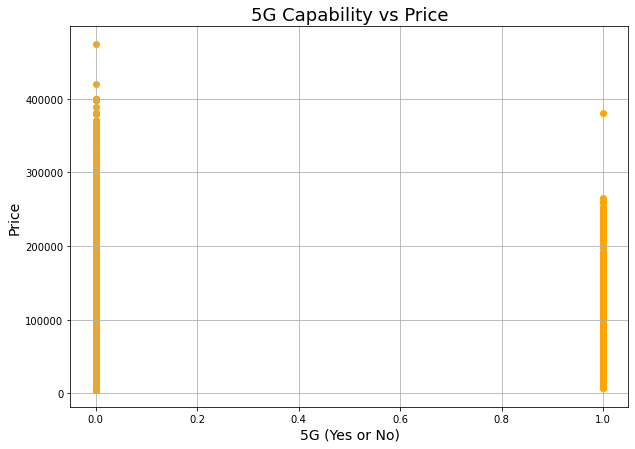

In [23]:
plt.figure(figsize=(10,7))
plt.scatter(df["5G"], df["Price"], color="orange")
plt.title("5G Capability vs Price", fontsize = 18)
plt.xlabel("5G (Yes or No)", fontsize = 14)
plt.ylabel("Price", fontsize = 14)
plt.grid(True)
plt.show()

<b>Observations</b><br><br>
We can see that a large number of datapoints exist for the prices of mobile phones without 5G. 
A reason for this might be the unavailability of many 5G phones in the dataset. Considering the mean value of prices in this case would give us a better idea. <br> Mobile phones without 5G has prices which range upto 600000. 
There must be outliers which we will have to take care later. 

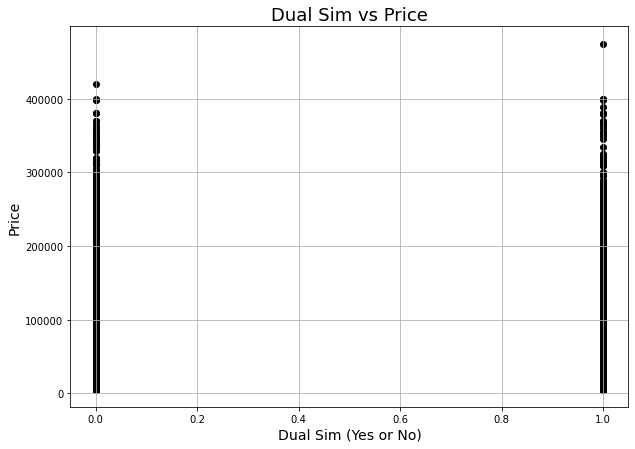

In [24]:
plt.figure(figsize=(10,7))
plt.scatter(df["Dual Sim"], df["Price"], color="black")
plt.title("Dual Sim vs Price", fontsize = 18)
plt.xlabel("Dual Sim (Yes or No)", fontsize = 14)
plt.ylabel("Price", fontsize = 14)
plt.grid(True)
plt.show()

<b>Observations</b><br><br>
A similar variation of prices is there to be seen for the Dual sim mobiles and single sim mobile phones. 


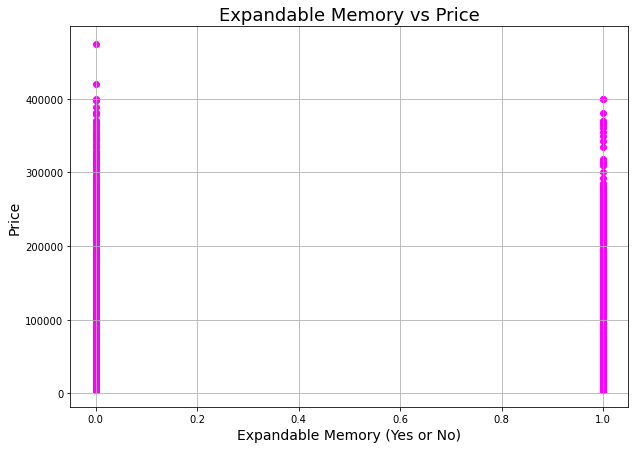

In [25]:
plt.figure(figsize=(10,7))
plt.scatter(df["Expandable Memory"], df["Price"], color="magenta")
plt.title("Expandable Memory vs Price", fontsize = 18)
plt.xlabel("Expandable Memory (Yes or No)", fontsize = 14)
plt.ylabel("Price", fontsize = 14)
plt.grid(True)
plt.show()

<b>Observations</b><br><br>
This graph also doesn't show a big difference between the mobile phone with and without expandable memory support. 
Equal distributions show that having an expandable memory or an extra slot for memory cards doesn't make any big difference in the prices.

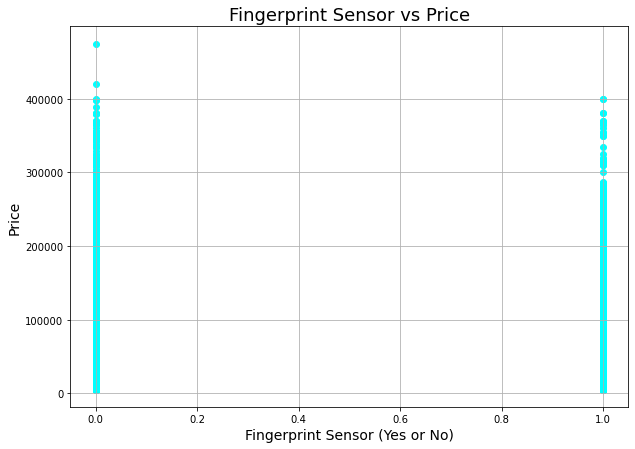

In [26]:
plt.figure(figsize=(10,7))
plt.scatter(df["Fingerprint Sensor"], df["Price"], color="cyan")
plt.title("Fingerprint Sensor vs Price", fontsize = 18)
plt.xlabel("Fingerprint Sensor (Yes or No)", fontsize = 14)
plt.ylabel("Price", fontsize = 14)
plt.grid(True)
plt.show()

<b>Observations</b><br><br>
Here also we can see an equal distribution among the prices. 

### Visualization using the Seaborn Library

In [27]:
import seaborn as sns

<AxesSubplot:xlabel='Price', ylabel='Brand'>

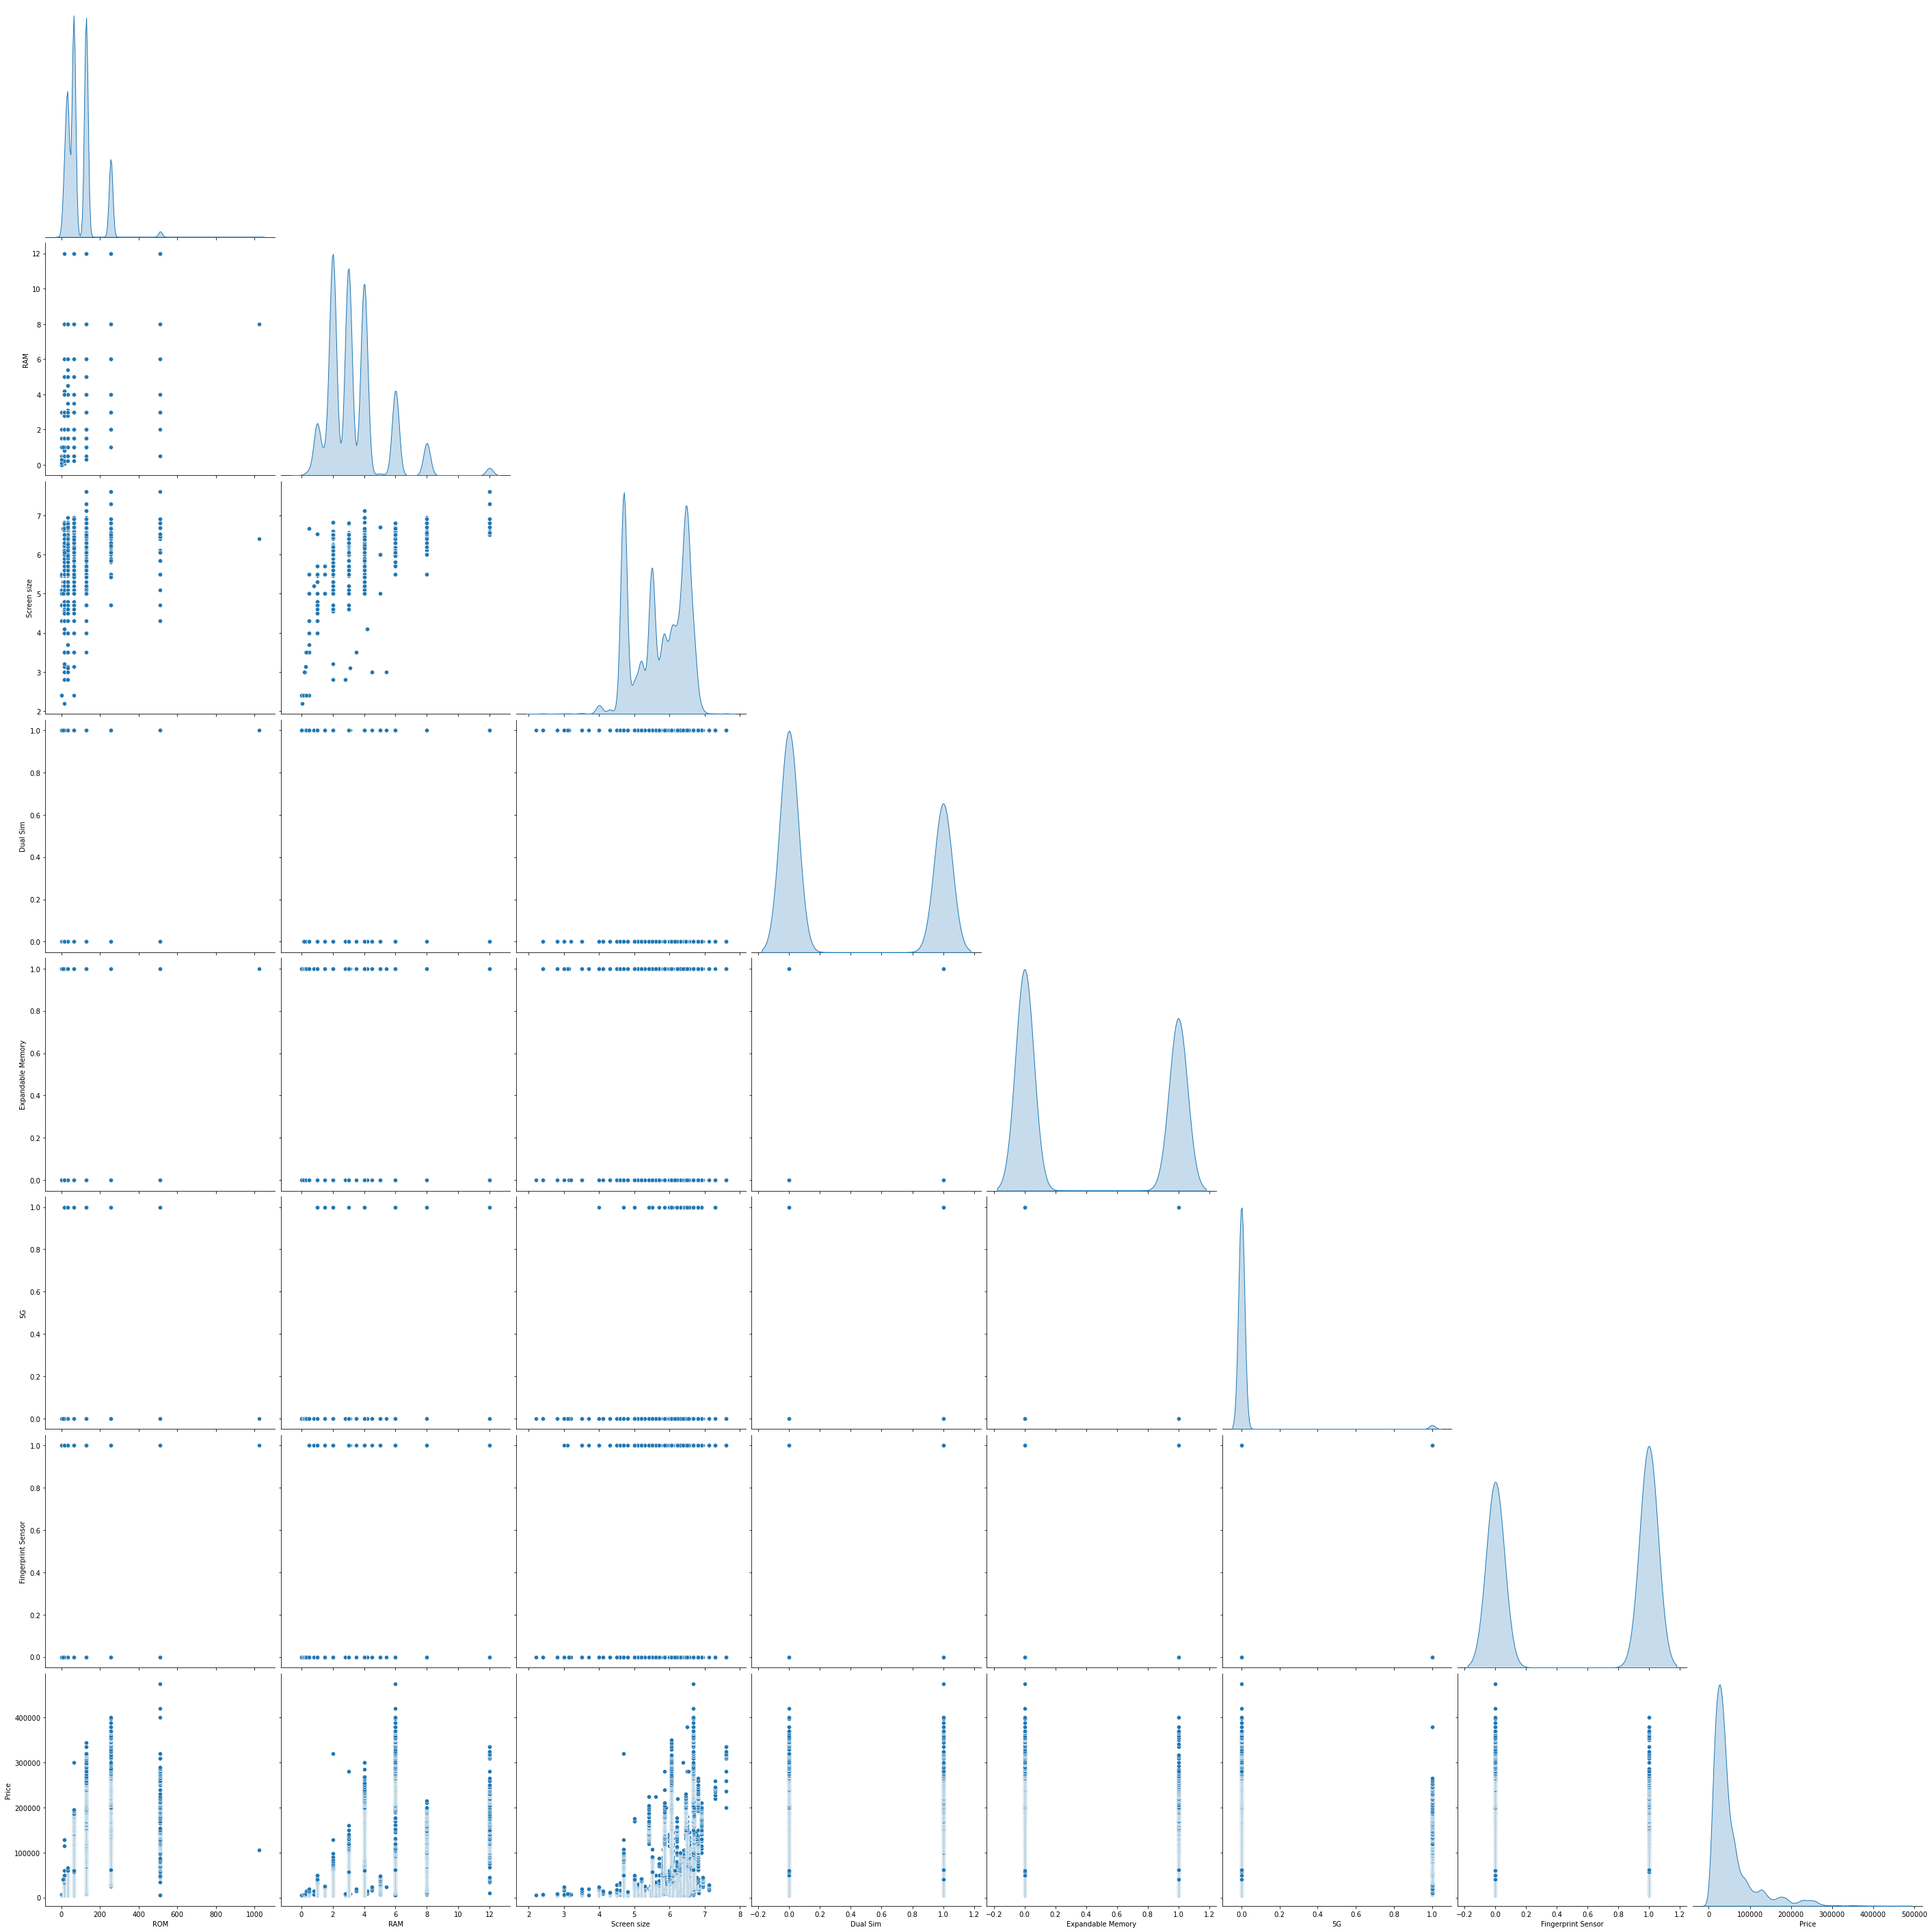

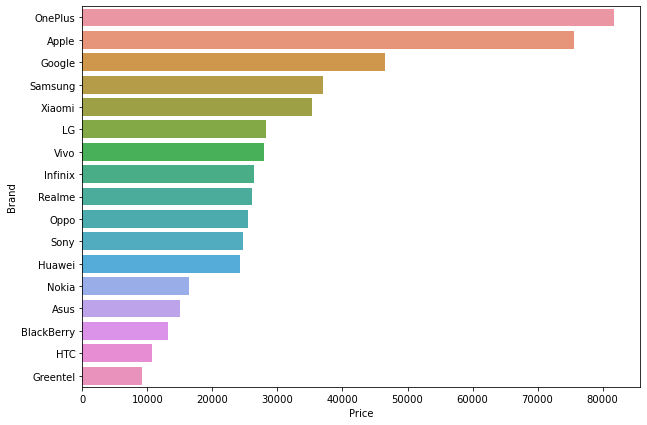

In [28]:
sns.pairplot(df, height=5, diag_kind="kde", corner=True)
plt.figure(figsize=(10,7))
sns.barplot(
    y=df["Brand"],
    x=df["Price"],    
    ci=False,
    order=df.groupby("Brand").mean()["Price"].sort_values(ascending=False).index,
)


<AxesSubplot:xlabel='ROM', ylabel='Price'>

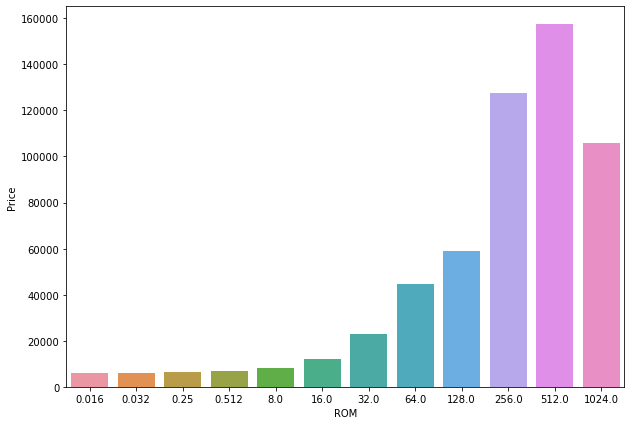

In [29]:
plt.figure(figsize=(10,7))
sns.barplot(
    x=df["ROM"],
    y=df["Price"],
    ci=False,
    order=df.groupby("ROM").mean()["Price"].index,
)


<b>Observations</b><br><br>
As we saw earlier Apple and the Oneplus brands have the most expensive mobile phones. In the second graph we can see the price variation for various ROM capacities. This has a direct relationship between the ROM and prices. When the ROM value increases the price also increases. The highest value is for mobiles with 512 GB or ROM.

<AxesSubplot:xlabel='RAM', ylabel='Price'>

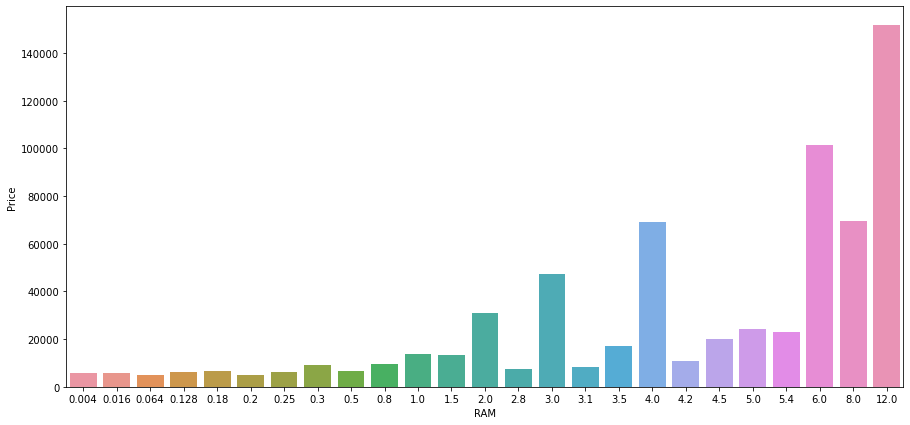

In [30]:
plt.figure(figsize=(15,7))
sns.barplot(
    x=df["RAM"],
    y=df["Price"],
    ci=False,
    order=df.groupby("RAM").mean()["Price"].index,
    linewidth=1
)

<b>Observations</b><br><br>
Here also we can see a linear relationship. When the RAM values increase the prices go up. But there are slight variations in it. The highest mean is for the 12GB variants. 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85]),
 [Text(0, 0, '2.2'),
  Text(1, 0, '2.4'),
  Text(2, 0, '2.8'),
  Text(3, 0, '3.0'),
  Text(4, 0, '3.1'),
  Text(5, 0, '3.14'),
  Text(6, 0, '3.2'),
  Text(7, 0, '3.5'),
  Text(8, 0, '3.7'),
  Text(9, 0, '4.0'),
  Text(10, 0, '4.1'),
  Text(11, 0, '4.3'),
  Text(12, 0, '4.5'),
  Text(13, 0, '4.55'),
  Text(14, 0, '4.6'),
  Text(15, 0, '4.7'),
  Text(16, 0, '4.8'),
  Text(17, 0, '5.0'),
  Text(18, 0, '5.1'),
  Text(19, 0, '5.15'),
  Text(20, 0, '5.2'),
  Text(21, 0, '5.3'),
  Text(22, 0, '5.42'),
  Text(23, 0, '5.45'),
  Text(24, 0, '5.46'),
  Text(25, 0, '5.5'),
  Text(26, 0, '5.6'),
  Text(27, 0, '5

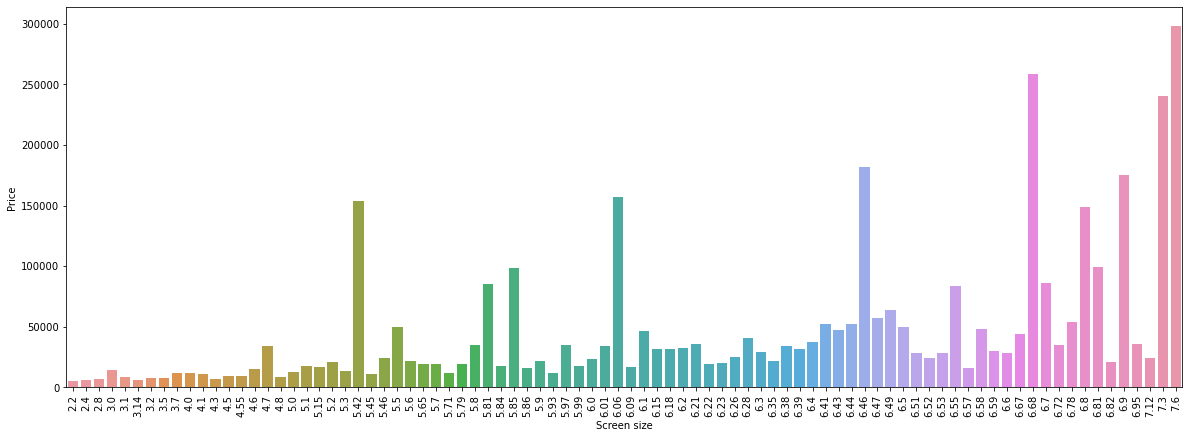

In [31]:
plt.figure(figsize=(20,7))
sns.barplot(
    x=df["Screen size"],
    y=df["Price"],
    ci=False,
    order=df.groupby("Screen size").mean()["Price"].index,
    linewidth=2
)
plt.xticks(rotation=90)

<AxesSubplot:xlabel='OS', ylabel='Price'>

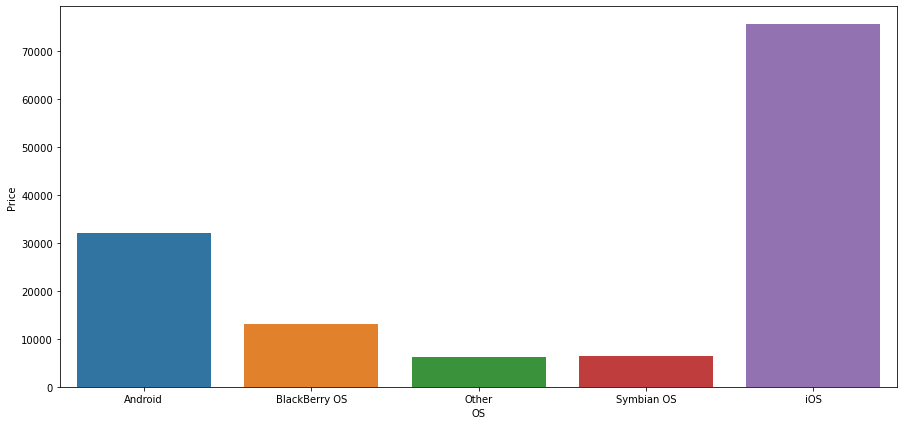

In [32]:
plt.figure(figsize=(15,7))
sns.barplot(
    x=df["OS"],
    y=df["Price"],
    ci=False,
    order=df.groupby("OS").mean()["Price"].index,
    linewidth=1
)

<AxesSubplot:xlabel='Dual Sim', ylabel='Price'>

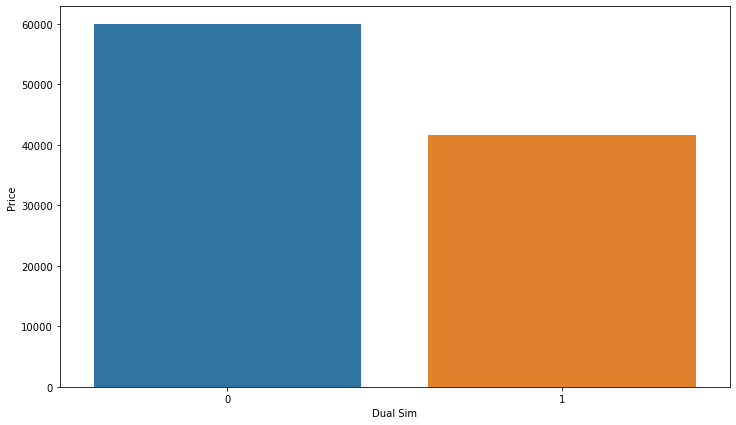

In [33]:
plt.figure(figsize=(12,7))
sns.barplot(
    x=df["Dual Sim"],
    y=df["Price"],
    ci=False,
    order=df.groupby("Dual Sim").mean()["Price"].index,
    linewidth=1
)

<b>Observations</b><br><br>
The average price of mobile phones without dual sim support is higher than the mobiles with single sim. 
This can be true since most flagship phones from Apple and Samsung doesn't support dual sim. and the trend is to move towards e-sims. 

<AxesSubplot:xlabel='5G', ylabel='Price'>

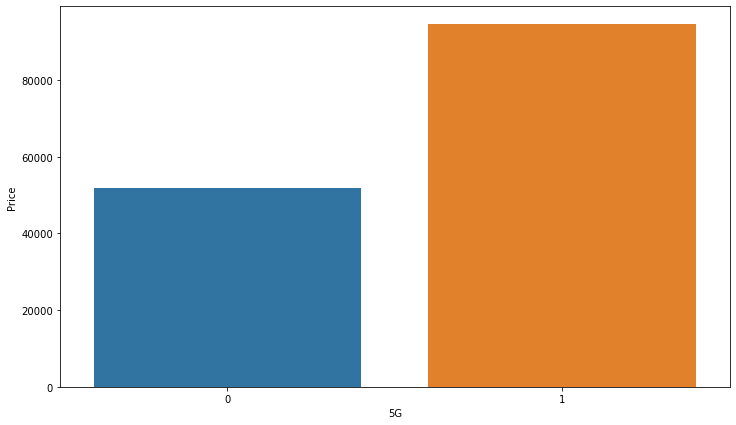

In [34]:
plt.figure(figsize=(12,7))
sns.barplot(
    x=df["5G"],
    y=df["Price"],
    ci=False,
    order=df.groupby("5G").mean()["Price"].index,
    linewidth=1
)

<b>Observations</b><br><br>
The average price for mobile phones with 5G is high.
5G mobile phones came recently and therefore they are not very old. Therefore they should have higher prices compared to other mobile phones. 

<AxesSubplot:xlabel='Expandable Memory', ylabel='Price'>

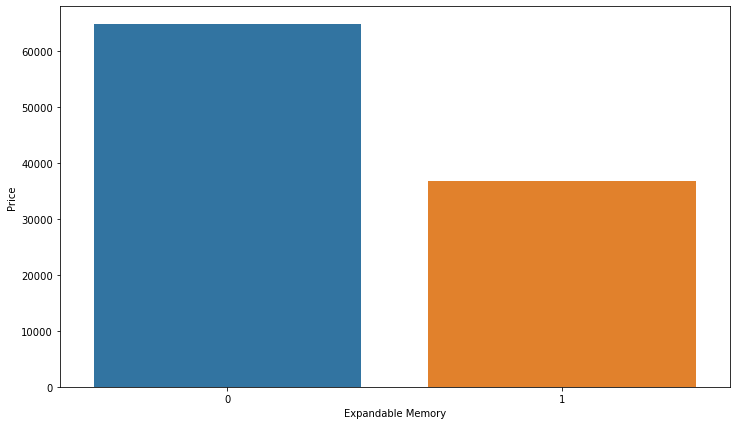

In [35]:
plt.figure(figsize=(12,7))
sns.barplot(
    x=df["Expandable Memory"],
    y=df["Price"],
    ci=False,
    order=df.groupby("Expandable Memory").mean()["Price"].index,
    linewidth=1
)

<b>Observations</b><br><br>
The average price for a mobile phone without expandable memory is high.
This is also possible due to the fact that many new mobile phones removed the extra memory slot and increased the internal memory capacity. 

<AxesSubplot:xlabel='Fingerprint Sensor', ylabel='Price'>

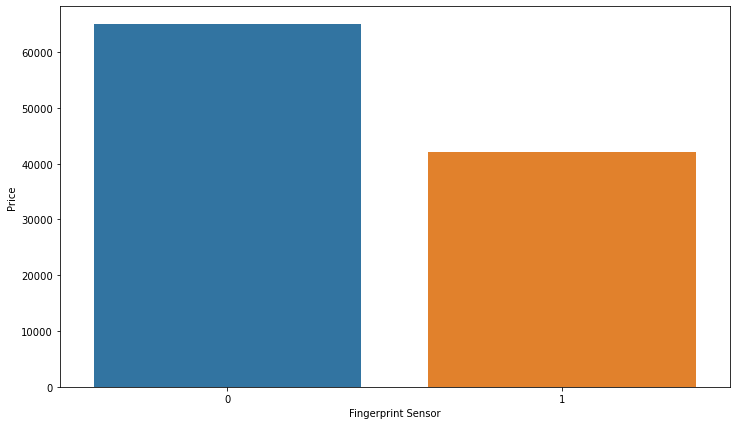

In [36]:
plt.figure(figsize=(12,7))
sns.barplot(
    x=df["Fingerprint Sensor"],
    y=df["Price"],
    ci=False,
    order=df.groupby("Fingerprint Sensor").mean()["Price"].index,
    linewidth=1
)

<b>Observations</b><br><br>
The average price for mobile phones without a fingerprint sensor is high compared mobile phones with it. 
This is possible due to the other authentication methods such as faceId which Apple provides. And also the feature phones doesn't have any of these features. 

<AxesSubplot:xlabel='Brand'>

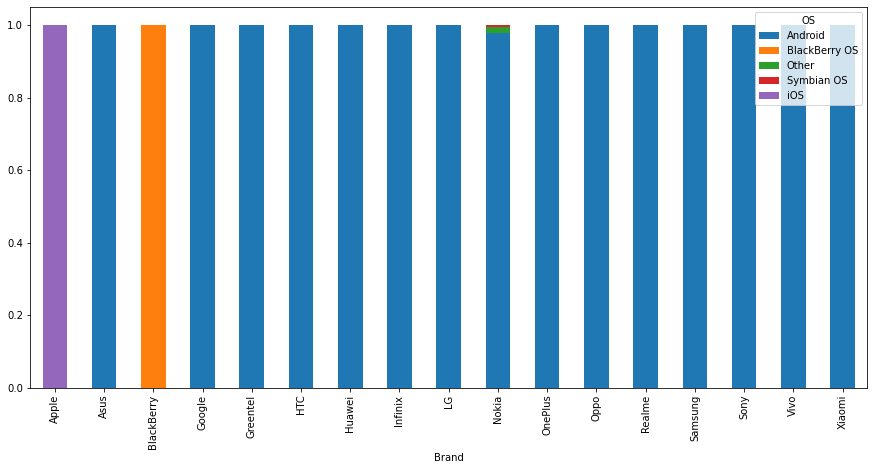

In [37]:
pd.crosstab(df["Brand"], df["OS"], normalize="index").plot(
    kind="bar", stacked=True, figsize=(15,7)
)

<b>Observations</b><br><br>
A variety of operating systems on a single brand is there to be seen only on Nokia phones. While the other mobile phones in our dataset is seen to be sticked to a single common operating system in all their models.

<AxesSubplot:xlabel='Brand'>

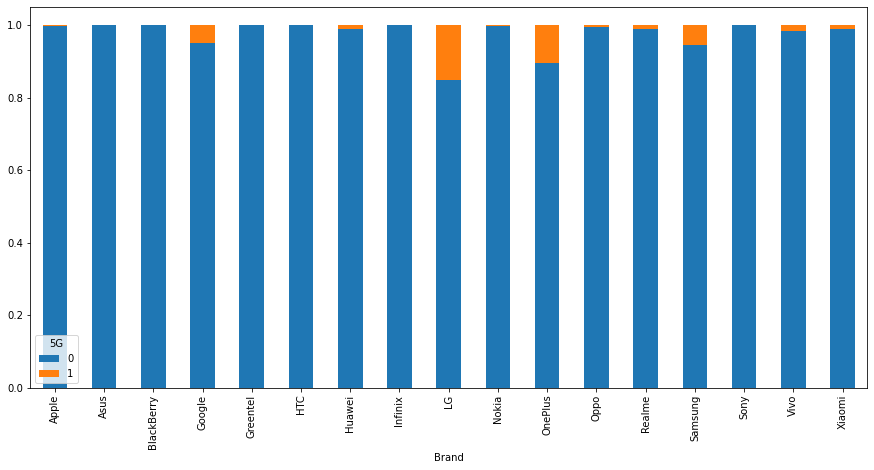

In [38]:
pd.crosstab(df["Brand"], df["5G"], normalize="index").plot(
    kind="bar", stacked=True, figsize=(15,7)
)

<b>Observations</b><br><br>
This graph show the usage of 5G capability in different brands of mobile phones. As we can see in our dataset there has been many 5G phones from LG and them from Oneplus. Other brands has very few mobile phones with 5G. 
We cannot 

<AxesSubplot:xlabel='Brand'>

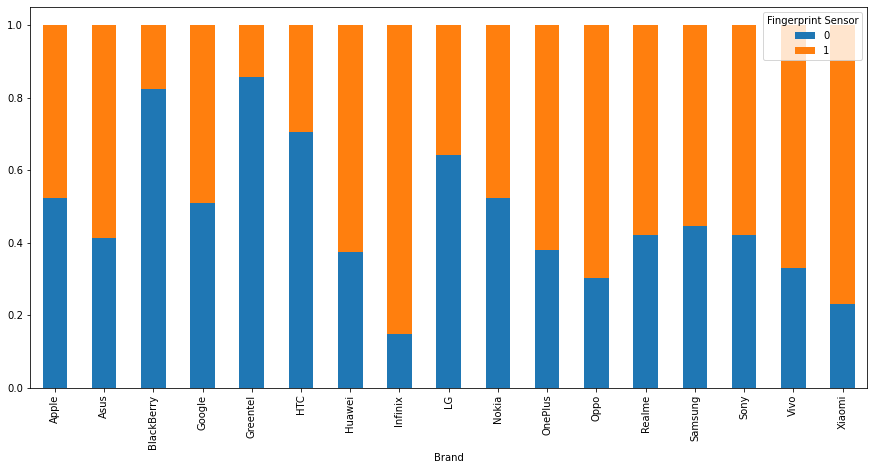

In [39]:
pd.crosstab(df["Brand"], df["Fingerprint Sensor"], normalize="index").plot(
    kind="bar", stacked=True, figsize=(15,7)
)

<AxesSubplot:xlabel='Brand'>

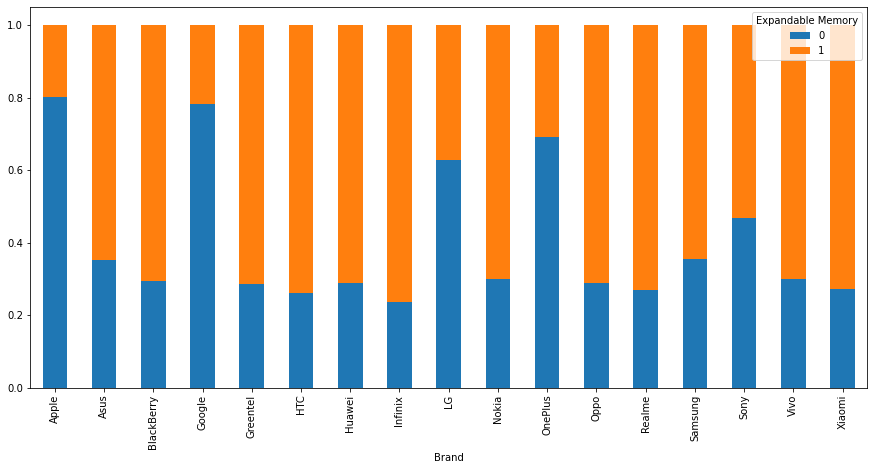

In [40]:
pd.crosstab(df["Brand"], df["Expandable Memory"], normalize="index").plot(
    kind="bar", stacked=True, figsize=(15,7)
)

<AxesSubplot:xlabel='Brand'>

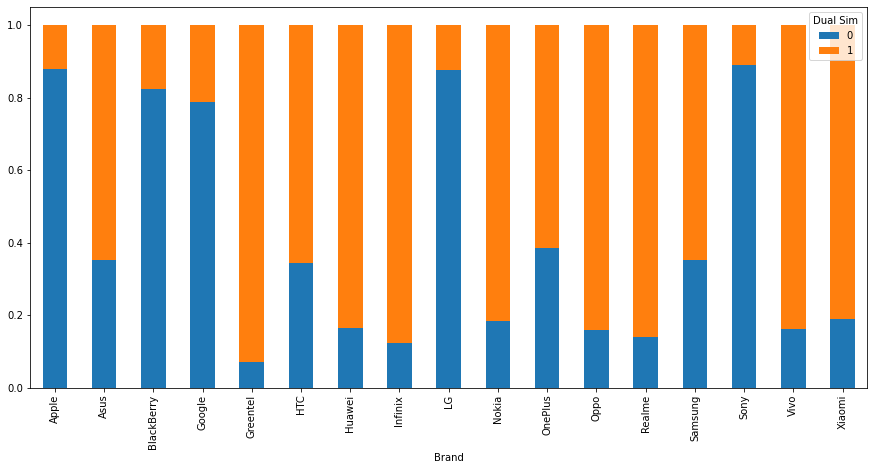

In [41]:
pd.crosstab(df["Brand"], df["Dual Sim"], normalize="index").plot(
    kind="bar", stacked=True, figsize=(15,7)
)

<b>Observations</b><br><br>
A few variations exist for the RAM capacities. <br>
The feature phones will have less RAM (less than 1GB) and smartphones will have RAM even upto 12 GB.
Therefore according to the dataset There are many phones with RAM in the range of 0 to 6GB and also with some outliers.

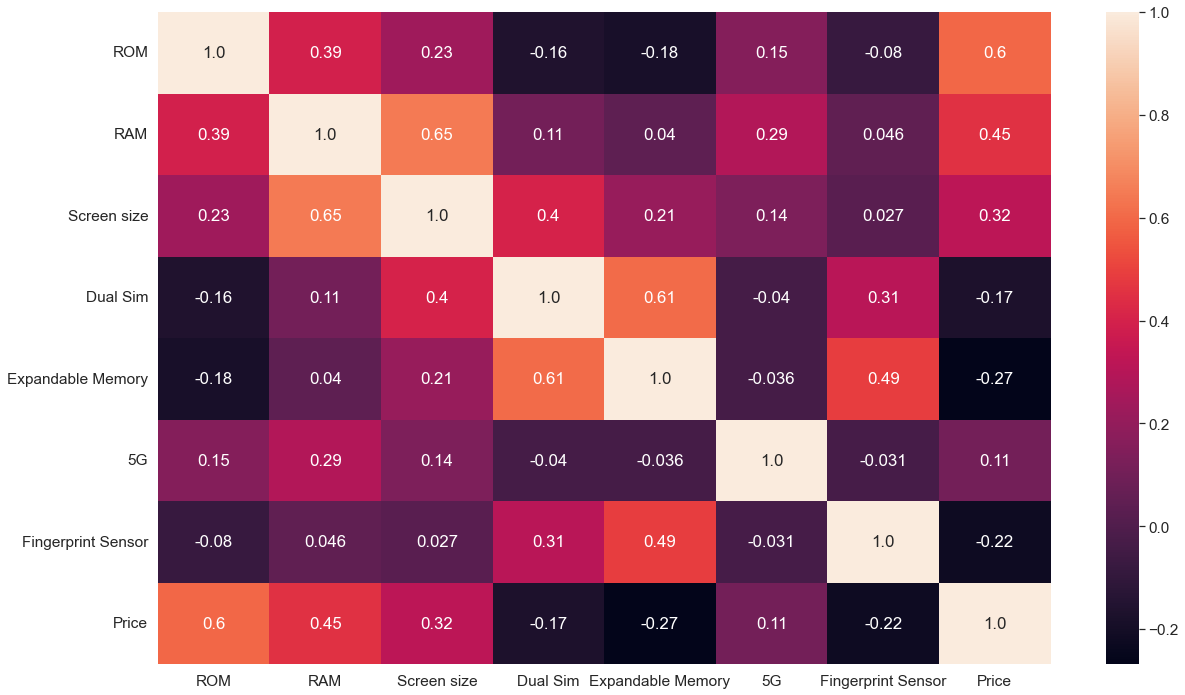

In [42]:
plt.figure(figsize=(20,12))
sns.set(font_scale=1.4)
sns.heatmap(df.corr(), annot=True, fmt=".2")
plt.show()

<b>Observations</b><br><br>
A few variations exist for the RAM capacities. <br>
The feature phones will have less RAM (less than 1GB) and smartphones will have RAM even upto 12 GB.
Therefore according to the dataset There are many phones with RAM in the range of 0 to 6GB and also with some outliers.
Positive correlation is represented by dark tones, whereas negative correlation is represented by lighter shades. We can see numbers indicating how features in grid cells are associated with one another since we have set annot=True. <br> 
We can deduce from this that "ROM", “RAM”, and “Screen size” correlates positively with "Price" while negatively with "Dual Sim", “Expandable Memory” and “Fingerprint Sensor”. There is essentially no relationship between "5G" and "Price".

In [43]:
df.describe()

,ROM,RAM,Screen size,Dual Sim,Expandable Memory,5G,Fingerprint Sensor,Price
count,40023.000000,40023.000000,40023.000000,40023.000000,40023.000000,40023.000000,40023.000000,40023.000000
mean,99.089356,3.398993,5.713437,0.401969,0.437673,0.017440,0.543962,52520.393774
std,78.277418,1.828223,0.735010,0.490302,0.496106,0.130905,0.498070,51767.697069
min,0.016000,0.004000,2.200000,0.000000,0.000000,0.000000,0.000000,5000.000000
25%,32.000000,2.000000,5.000000,0.000000,0.000000,0.000000,0.000000,22072.500000
50%,64.000000,3.000000,5.850000,0.000000,0.000000,0.000000,1.000000,35000.000000
75%,128.000000,4.000000,6.400000,1.000000,1.000000,0.000000,1.000000,59900.000000
max,1024.000000,12.000000,7.600000,1.000000,1.000000,1.000000,1.000000,475000.000000


In [44]:
df.head()

,Brand,Model,ROM,RAM,OS,Screen size,Dual Sim,Expandable Memory,5G,Fingerprint Sensor,Price
0,Huawei,Y5 Prime,16.0,2.0,Android,5.45,1,1,0,1,5000
1,Huawei,Y5,16.0,2.0,Android,5.71,1,1,0,1,5000
2,Apple,iPhone 4S,16.0,0.5,iOS,3.50,0,0,0,0,5000
3,Huawei,Y5,16.0,2.0,Android,5.71,0,0,0,0,5000
4,Huawei,Y5,16.0,2.0,Android,5.71,1,0,0,0,5000


In [45]:
for column in df.columns:
    if df[column].dtype == "object":
        print(column.upper(), ": ", df[column].nunique())
        print(df[column].value_counts())
        print("\n")
        print("*" * 55)
        print("\n")

BRAND :  17
Apple         18751
Samsung        8716
Huawei         3027
Xiaomi         2941
Sony           2301
Oppo           1264
Vivo            797
Nokia           638
LG              561
OnePlus         342
Realme          315
Google          147
Infinix         114
HTC              61
BlackBerry       17
Asus             17
Greentel         14
Name: Brand, dtype: int64


*******************************************************


MODEL :  600
iPhone 7         3850
iPhone 7 Plus    2883
iPhone 6S        2401
iPhone X         1352
iPhone 8          989
                 ... 
Q70                 1
Redmi Note 4X       1
Galaxy M62          1
Honor 9             1
One E9              1
Name: Model, Length: 600, dtype: int64


*******************************************************


OS :  5
Android          21242
iOS              18751
BlackBerry OS       17
Other               10
Symbian OS           3
Name: OS, dtype: int64


*******************************************************




## Distribution & Outliers

In [46]:
df.columns

Index(['Brand', 'Model', 'ROM', 'RAM', 'OS', 'Screen size', 'Dual Sim',
       'Expandable Memory', '5G', 'Fingerprint Sensor', 'Price'],
      dtype='object')

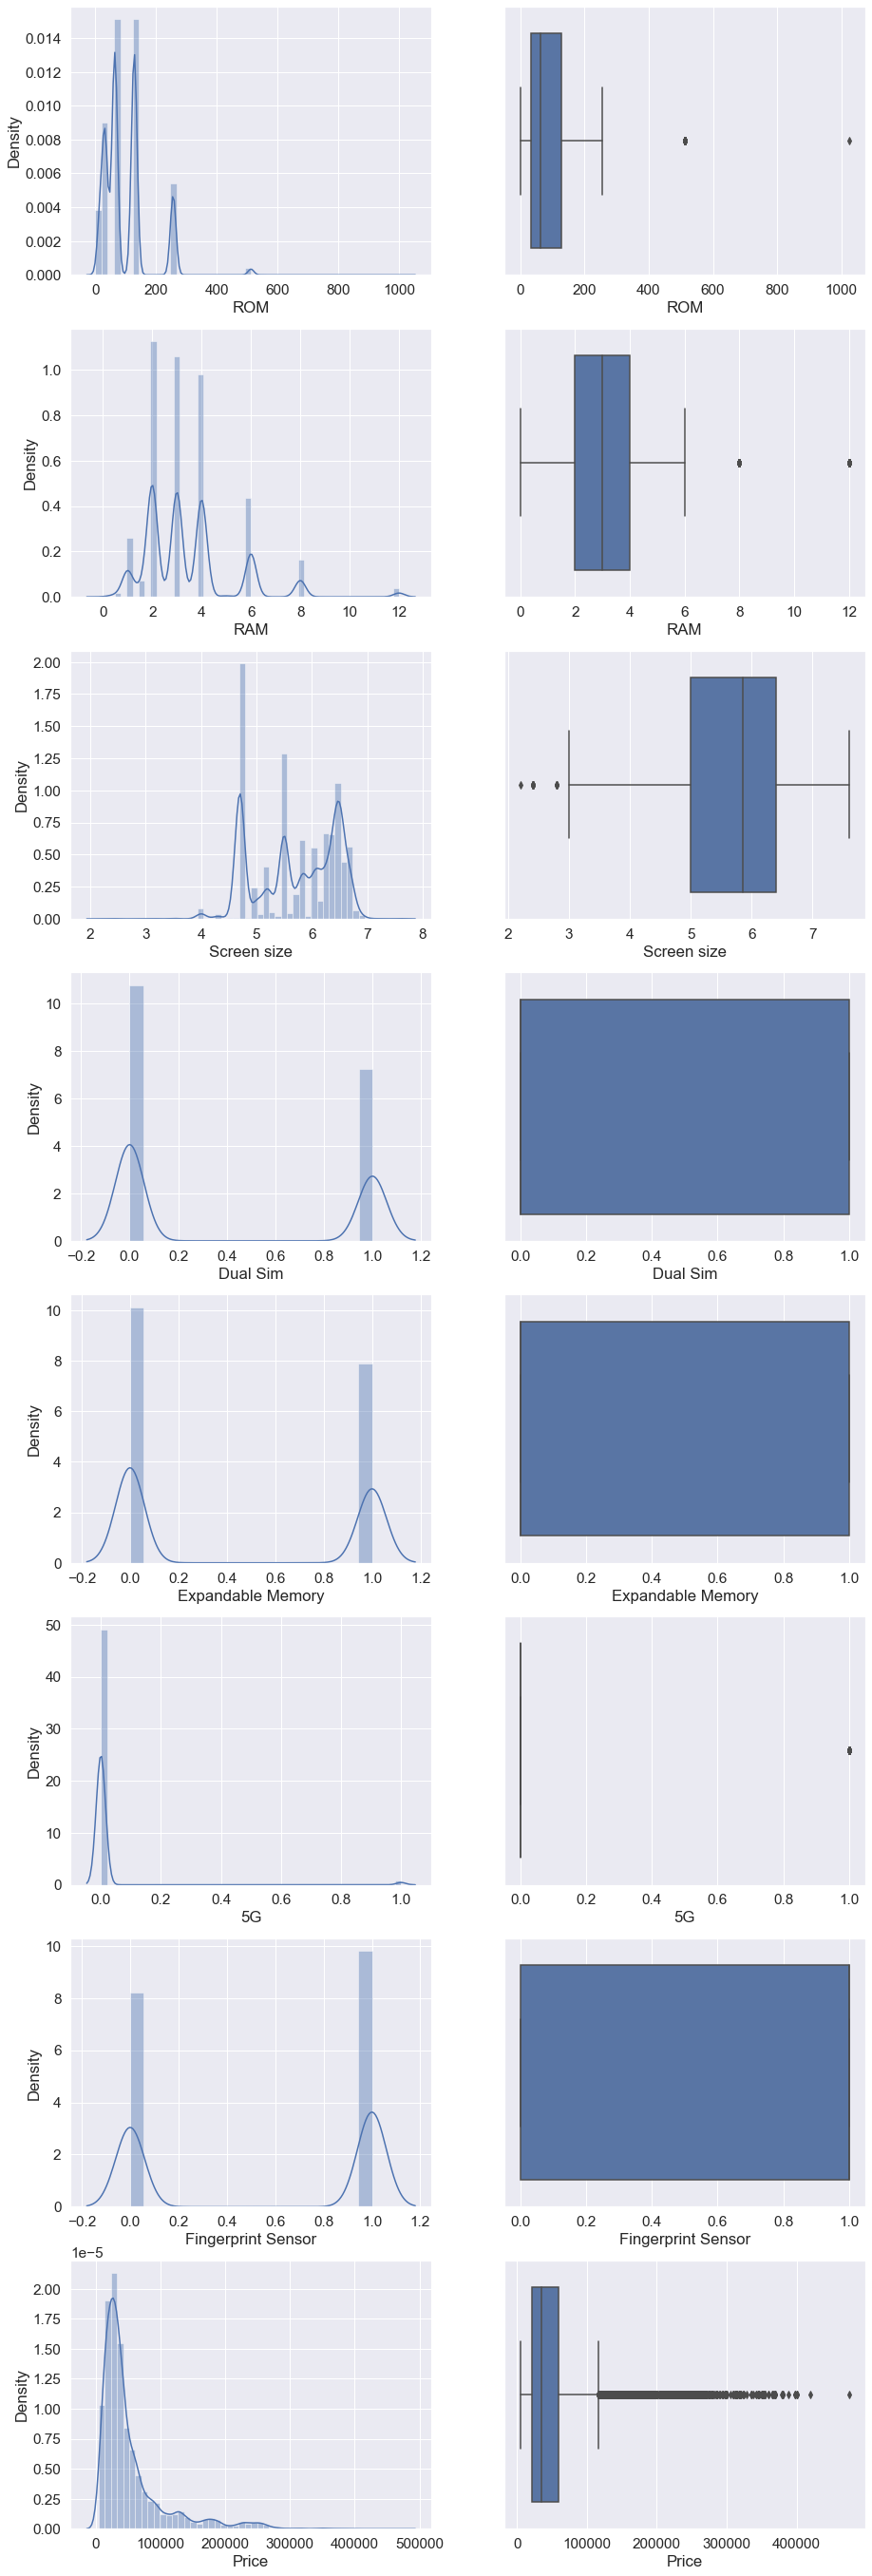

In [47]:
a=1
plt.figure(figsize=(15,80))
for i in df[
    [
      'Brand', 'Model', 'ROM', 'RAM', 'OS', 'Screen size', 'Dual Sim',
       'Expandable Memory', '5G', 'Fingerprint Sensor', 'Price',  
    ]
]:
    if df[i].dtype != "object":
        plt.subplot(13,2,a)
        sns.distplot(df[i])
        plt.subplot(13,2,a+1)
        sns.boxplot(df[i])
        a +=2

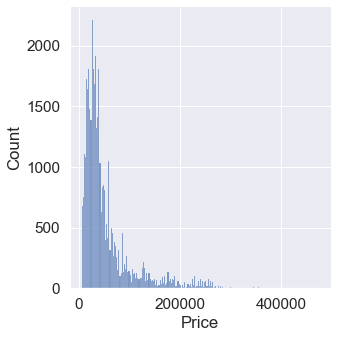

In [48]:
sns.displot(data=df, x="Price")

<Figure size 1296x504 with 0 Axes>

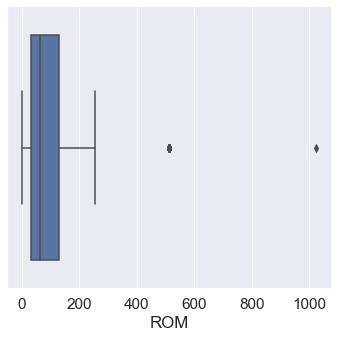

In [49]:
plt.figure(figsize=(18,7))
sns.catplot(data=df, x="ROM", kind="box")

<AxesSubplot:>

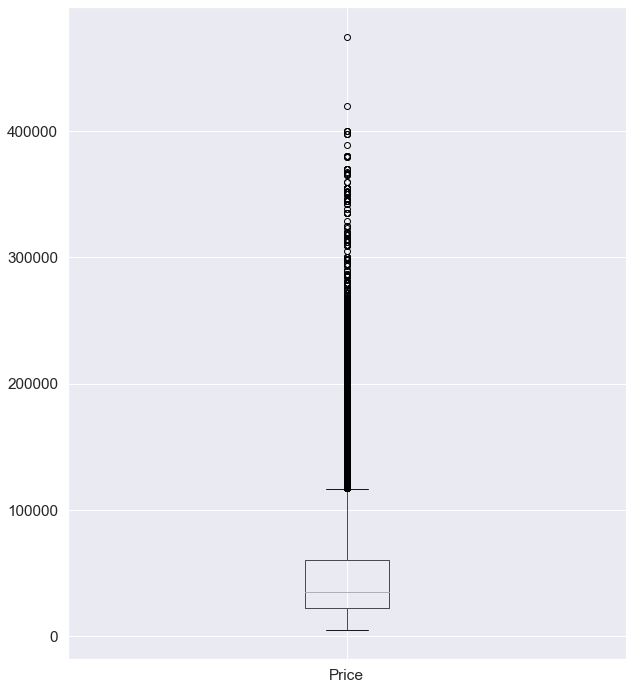

In [50]:
plt.figure(figsize=(10,12))
df.boxplot('Price')

In [51]:
# import numpy as np
# def remove_outlier(col):
#     sorted(col)
#     q1,q3 = np.quantile(col, [0.25,0.75])
#     iqr = q3-q1
#     ll = q1-1.5*iqr
#     ul = q3+1.5*iqr
#     return ll+ul

In [52]:
# new_df['Price'].dtype

In [53]:
# new_df = df

# if new_df['Price'].dtype != "object":
#     ll, ul = remove_outlier(df[i])
#     new_df['Price'] = np.where(new_df[i]> ul, ul, new_df['Price'])
#     new_df['Price'] = np.where(new_df[i]< ll, ll, new_df['Price'])

<b>Saving the dataframe as a CSV file.</b>

In [55]:
file_name = 'MobilePhonedata_new.csv'
  
# saving the excel
df.to_csv(file_name)
print('DataFrame is written to CSV File successfully.')

DataFrame is written to CSV File successfully.
